# Importing & Cleaning Data in R: Case Studies
>Running exciting analyses on interesting datasets is the dream of every data scientist.

## Libraries

In [71]:
library(readr)
library(dplyr)
library(tidyr)
library(lubridate)
library(stringr)
library(readxl)
library(ggplot2)
library(data.table)
library(gdata)

Warning message:
"package 'gdata' was built under R version 3.6.3"gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)
gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.

gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.

Attaching package: 'gdata'

The following objects are masked from 'package:data.table':

    first, last

The following objects are masked from 'package:dplyr':

    combine, first, last

T

# Ticket Sales Data

Importing and cleaning some wonderfully messy online ticket sales data.

In [35]:
sales = read_csv("https://assets.datacamp.com/production/repositories/377/datasets/9dcd424ac6ebc2a408dbd5cd167b970889f18e66/sales.csv")


Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  tickets_purchased_qty = col_double(),
  trans_face_val_amt = col_double(),
  event_date_time = col_datetime(format = ""),
  event_dt = col_date(format = ""),
  sales_ord_create_dttm = col_datetime(format = ""),
  sales_ord_tran_dt = col_date(format = ""),
  print_flg = col_logical(),
  dist_to_ven = col_double()
)
See spec(...) for full column specifications.
Warning message:
"4 parsing failures.
 row                   col   expected actual                                                                                                                  file
2516 sales_ord_create_dttm date like    NULL 'https://assets.datacamp.com/production/repositories/377/datasets/9dcd424ac6ebc2a408dbd5cd167b970889f18e66/sales.csv'
3863 sales_ord_create_dttm date like    NULL 'https://assets.datacamp.com/production/repositories/377/datasets/9dcd424ac6e

## Examining the Ticket Sales Data

The first step when preparing to clean data is to inspect it.

* `dim()` returns the dimensions of an object
* `head()` displays the first part of an object
* `names()` returns the names associated with an object

In [36]:
# View dimensions of sales
dim(sales)

# Inspect first 6 rows of sales
head(sales)

# View column names of sales
names(sales)

[1] 5000   46

X1,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,59
3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,4f10fd8b9f550352bd56,ac4b847b3fde66f2117e,63814f3d63317f1b56c4,3b3a628f83135acd0676,Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "X1"                     "event_id"               "primary_act_id"        
 [4] "secondary_act_id"       "purch_party_lkup_id"    "event_name"            
 [7] "primary_act_name"       "secondary_act_name"     "major_cat_name"        
[10] "minor_cat_name"         "la_event_type_cat"      "event_disp_name"       
[13] "ticket_text"            "tickets_purchased_qty"  "trans_face_val_amt"    
[16] "delivery_type_cd"       "event_date_time"        "event_dt"              
[19] "presale_dt"             "onsale_dt"              "sales_ord_create_dttm" 
[22] "sales_ord_tran_dt"      "print_dt"               "timezn_nm"             
[25] "venue_city"             "venue_state"            "venue_postal_cd_sgmt_1"
[28] "sales_platform_cd"      "print_flg"              "la_valid_tkt_event_flg"
[31] "fin_mkt_nm"             "web_session_cookie_val" "gndr_cd"               
[34] "age_yr"                 "income_amt"             "edu_val"               
[37] "edu_1st_indv_val"       "edu_2nd_indv_val"       "adults_in_hh_num"      
[40] "married_ind"            "child_present_ind"      "home_owner_ind"        
[43] "occpn_val"              "occpn_1st_val"          "occpn_2nd_val"         
[46] "dist_to_ven"

Notice how the rows appear to represent individual purchases and the columns contain different pieces of information about each purchase.

## Summarizing the data

Luckily, the rows and columns appear to be arranged in a meaningful way: _each row represents an observation and each column a variable, or piece of information about that observation_

The functions `str()` and `summary()` can be very helpful.

In [37]:
# Look at structure of sales
str(sales)

# View a summary of sales
summary(sales)

# Get a glimpse of sales
glimpse(sales)

tibble [5,000 x 46] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1                    : num [1:5000] 1 2 3 4 5 6 7 8 9 10 ...
 $ event_id              : chr [1:5000] "abcaf1adb99a935fc661" "6c56d7f08c95f2aa453c" "c7ab4524a121f9d687d2" "394cb493f893be9b9ed1" ...
 $ primary_act_id        : chr [1:5000] "43f0436b905bfa7c2eec" "1a3e9aecd0617706a794" "4b677c3f5bec71eec8d1" "b1ccea01ad6ef8522796" ...
 $ secondary_act_id      : chr [1:5000] "b85143bf51323b72e53c" "f53529c5679ea6ca5a48" "b85143bf51323b72e53c" "b85143bf51323b72e53c" ...
 $ purch_party_lkup_id   : chr [1:5000] "7dfa56dd7d5956b17587" "4f9e6fc637eaf7b736c2" "6c2545703bd527a7144d" "527d6b1eaffc69ddd882" ...
 $ event_name            : chr [1:5000] "Xfinity Center Mansfield Premier Parking: Florida Georgia Line" "Gorge Camping - dave matthews band - sept 3-7" "Dodge Theatre Adams Street Parking - benise" "Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow" ...
 $ primary_act_name      : chr [1:5000] "XFINITY Center Mansfield

       X1         event_id         primary_act_id     secondary_act_id  
 Min.   :   1   Length:5000        Length:5000        Length:5000       
 1st Qu.:1251   Class :character   Class :character   Class :character  
 Median :2500   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2500                                                           
 3rd Qu.:3750                                                           
 Max.   :5000                                                           
                                                                        
 purch_party_lkup_id  event_name        primary_act_name   secondary_act_name
 Length:5000         Length:5000        Length:5000        Length:5000       
 Class :character    Class :character   Class :character   Class :character  
 Mode  :character    Mode  :character   Mode  :character   Mode  :character  
                                                                             
                          

Rows: 5,000
Columns: 46
$ X1                     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
$ event_id               <chr> "abcaf1adb99a935fc661", "6c56d7f08c95f2aa453...
$ primary_act_id         <chr> "43f0436b905bfa7c2eec", "1a3e9aecd0617706a79...
$ secondary_act_id       <chr> "b85143bf51323b72e53c", "f53529c5679ea6ca5a4...
$ purch_party_lkup_id    <chr> "7dfa56dd7d5956b17587", "4f9e6fc637eaf7b736c...
$ event_name             <chr> "Xfinity Center Mansfield Premier Parking: F...
$ primary_act_name       <chr> "XFINITY Center Mansfield Premier Parking", ...
$ secondary_act_name     <chr> "NULL", "Dave Matthews Band", "NULL", "NULL"...
$ major_cat_name         <chr> "MISC", "MISC", "MISC", "MISC", "MISC", "MIS...
$ minor_cat_name         <chr> "PARKING", "CAMPING", "PARKING", "PARKING", ...
$ la_event_type_cat      <chr> "PARKING", "INVALID", "PARKING", "PARKING", ...
$ event_disp_name        <chr> "Xfinity Center Mansfield Premier Parking: F...
$ ticket_text            <ch

## Removing redundant info

The first column of data is just a duplication of the row numbers. Not very useful. We will go ahead and delete that column.

In [38]:
# Remove the first column of sales: sales2
sales2 = sales[,-1]

## Information not worth keeping

Many of the columns have information that's of no use to us. For example, the first four columns contain internal codes representing particular events. The last fifteen columns also aren't worth keeping; there are too many missing values to make them worthwhile.

An easy way to get rid of unnecessary columns is to create a vector containing the column indices we want to keep, then subset the data based on that vector using single bracket subsetting.

In [39]:
nrow(sales2)

[1] 5000

In [40]:
ncol(sales2)

[1] 45

In [41]:
# Define a vector of column indices: keep
keep <- c(5:(ncol(sales2)-15))

# Subset sales2 using keep: sales3
sales3 <- sales2[,keep]

head(sales3)

event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,ticket_text,tickets_purchased_qty,trans_face_val_amt,...,sales_ord_tran_dt,print_dt,timezn_nm,venue_city,venue_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm
Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,"THIS TICKET IS VALID FOR PARKING ONLY GOOD THIS DAY ONLY PREMIER PARKING PASS XFINITY CENTER,LOTS 4 PM SAT SEP 12 2015 7:30 PM",1,45,...,2015-09-11,2015-09-12,EST,MANSFIELD,MASSACHUSETTS,02048,www.concerts.livenation.com,TRUE,N,Boston
Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,"%OVERNIGHT C A M P I N G%* * * * * *%GORGE CAMPGROUND%* GOOD THIS DATE ONLY *%SEP 3 - 6, 2009",1,75,...,2009-07-05,2009-09-01,PST,QUINCY,WASHINGTON,98848,NULL,TRUE,N,Seattle
Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,ADAMS STREET GARAGE%PARKING FOR 4/21/06 ONLY%DODGE THEATRE PARKING PASS%ENTRANCE ON ADAMS STREET%BENISE%GARAGE OPENS AT 6:00PM,1,5,...,2006-04-05,2006-04-05,MST,PHOENIX,ARIZONA,85003,NULL,TRUE,N,Arizona
Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,THIS TICKET IS VALID FOR PARKING ONLY GOOD FOR THIS DATE ONLY VIP PARKING PASS GEXA ENERGY PAVILION FRI SEP 02 2011 7:00 PM,1,20,...,2011-07-01,2011-07-06,CST,DALLAS,TEXAS,75210,NULL,TRUE,N,Dallas
Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,PARKING,Premier Parking - motley crue,"THIS TICKET IS VALID%FOR PARKING ONLY%GOOD THIS DATE ONLY%PREMIER PARKING PASS%WHITE RIVER AMPHITHEATRE%SAT JUL 30, 2005 6:00PM",1,20,...,2005-06-18,2005-06-28,PST,AUBURN,WASHINGTON,98092,NULL,TRUE,N,Seattle
Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,FAST LANE JOURNEY FAST LANE EVENT THIS IS NOT A TICKET SAN MANUEL AMPHITHEATER SAT JUL 21 2012 7:00 PM,2,10,...,2012-07-21,2012-07-21,PST,SAN BERNARDINO,CALIFORNIA,92407,www.livenation.com,TRUE,N,Los Angeles


## Separating columns

Some of the columns in your data frame include multiple pieces of information that should be in separate columns. We will separate such a column into two: one for date and one for time. We will use the `separate()` function from the `tidyr` package

In [42]:
head(sales3$event_date_time)

[1] "2015-09-12 23:30:00 UTC" "2009-09-05 01:00:00 UTC"
[3] "2006-04-22 01:30:00 UTC" "2011-09-03 00:00:00 UTC"
[5] "2005-07-31 01:00:00 UTC" "2012-07-22 02:00:00 UTC"

In [43]:
head(sales$sales_ord_create_dttm)

[1] "2015-09-11 18:17:45 UTC" "2009-07-06 00:00:00 UTC"
[3] "2006-04-05 00:00:00 UTC" "2011-07-01 17:38:50 UTC"
[5] "2005-06-18 00:00:00 UTC" "2012-07-21 17:20:18 UTC"

In [44]:
# Split event_date_time: sales4
sales4 <- separate(sales3, event_date_time, c("event_dt", "event_time"), sep = " ")

# Split sales_ord_create_dttm: sales5
sales5 <- separate(sales4, sales_ord_create_dttm, c("ord_create_dt", "ord_create_time"), sep=" ")


In [45]:
head(sales5)

event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,ticket_text,tickets_purchased_qty,trans_face_val_amt,...,sales_ord_tran_dt,print_dt,timezn_nm,venue_city,venue_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm
Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,"THIS TICKET IS VALID FOR PARKING ONLY GOOD THIS DAY ONLY PREMIER PARKING PASS XFINITY CENTER,LOTS 4 PM SAT SEP 12 2015 7:30 PM",1,45,...,2015-09-11,2015-09-12,EST,MANSFIELD,MASSACHUSETTS,02048,www.concerts.livenation.com,TRUE,N,Boston
Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,"%OVERNIGHT C A M P I N G%* * * * * *%GORGE CAMPGROUND%* GOOD THIS DATE ONLY *%SEP 3 - 6, 2009",1,75,...,2009-07-05,2009-09-01,PST,QUINCY,WASHINGTON,98848,NULL,TRUE,N,Seattle
Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,ADAMS STREET GARAGE%PARKING FOR 4/21/06 ONLY%DODGE THEATRE PARKING PASS%ENTRANCE ON ADAMS STREET%BENISE%GARAGE OPENS AT 6:00PM,1,5,...,2006-04-05,2006-04-05,MST,PHOENIX,ARIZONA,85003,NULL,TRUE,N,Arizona
Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,THIS TICKET IS VALID FOR PARKING ONLY GOOD FOR THIS DATE ONLY VIP PARKING PASS GEXA ENERGY PAVILION FRI SEP 02 2011 7:00 PM,1,20,...,2011-07-01,2011-07-06,CST,DALLAS,TEXAS,75210,NULL,TRUE,N,Dallas
Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,PARKING,Premier Parking - motley crue,"THIS TICKET IS VALID%FOR PARKING ONLY%GOOD THIS DATE ONLY%PREMIER PARKING PASS%WHITE RIVER AMPHITHEATRE%SAT JUL 30, 2005 6:00PM",1,20,...,2005-06-18,2005-06-28,PST,AUBURN,WASHINGTON,98092,NULL,TRUE,N,Seattle
Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,FAST LANE JOURNEY FAST LANE EVENT THIS IS NOT A TICKET SAN MANUEL AMPHITHEATER SAT JUL 21 2012 7:00 PM,2,10,...,2012-07-21,2012-07-21,PST,SAN BERNARDINO,CALIFORNIA,92407,www.livenation.com,TRUE,N,Los Angeles


## Dealing with warnings

In [46]:
# Define an issues vector
issues = c(2516, 3863, 4082, 4183)

# Print values of sales_ord_create_dttm at these indices
sales3$sales_ord_create_dttm[issues]

# Print a well-behaved value of sales_ord_create_dttm
sales3$sales_ord_create_dttm[2517]

[1] NA NA NA NA

[1] "2013-08-04 23:07:19 UTC"

## Identifying dates

Some of the columns in our dataset contain dates of different events. Right now, they are stored as character strings. That's fine if all we want to do is look up the date associated with an event, but if we want to do any comparisons or math with the dates, it's MUCH easier to store them as `Date` objects.

Luckily, all of the date columns in this dataset have the substring `"dt"` in their name, so we can use the `str_detect()` function of the `stringr` package to find the date columns. Then we can coerce them to `Date` objects using a function from the `lubridate` package.

We'll use `lapply()` to apply the appropriate `lubridate` function to all of the columns that contain dates.
```python
lapply(my_data_frame[, cols], function_name)
```

In [47]:
# Find columns of sales5 containing "dt": date_cols
date_cols <- str_detect(names(sales5), "dt")

# Coerce date columns into Date objects
sales5[, date_cols] <- lapply(sales5[, date_cols], ymd)

Warning message:
" 2892 failed to parse."Warning message:
" 101 failed to parse."Warning message:
" 424 failed to parse."

In [48]:
head(sales5)

event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,ticket_text,tickets_purchased_qty,trans_face_val_amt,...,sales_ord_tran_dt,print_dt,timezn_nm,venue_city,venue_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm
Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,"THIS TICKET IS VALID FOR PARKING ONLY GOOD THIS DAY ONLY PREMIER PARKING PASS XFINITY CENTER,LOTS 4 PM SAT SEP 12 2015 7:30 PM",1,45,...,2015-09-11,2015-09-12,EST,MANSFIELD,MASSACHUSETTS,02048,www.concerts.livenation.com,TRUE,N,Boston
Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,"%OVERNIGHT C A M P I N G%* * * * * *%GORGE CAMPGROUND%* GOOD THIS DATE ONLY *%SEP 3 - 6, 2009",1,75,...,2009-07-05,2009-09-01,PST,QUINCY,WASHINGTON,98848,NULL,TRUE,N,Seattle
Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,ADAMS STREET GARAGE%PARKING FOR 4/21/06 ONLY%DODGE THEATRE PARKING PASS%ENTRANCE ON ADAMS STREET%BENISE%GARAGE OPENS AT 6:00PM,1,5,...,2006-04-05,2006-04-05,MST,PHOENIX,ARIZONA,85003,NULL,TRUE,N,Arizona
Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,THIS TICKET IS VALID FOR PARKING ONLY GOOD FOR THIS DATE ONLY VIP PARKING PASS GEXA ENERGY PAVILION FRI SEP 02 2011 7:00 PM,1,20,...,2011-07-01,2011-07-06,CST,DALLAS,TEXAS,75210,NULL,TRUE,N,Dallas
Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,PARKING,Premier Parking - motley crue,"THIS TICKET IS VALID%FOR PARKING ONLY%GOOD THIS DATE ONLY%PREMIER PARKING PASS%WHITE RIVER AMPHITHEATRE%SAT JUL 30, 2005 6:00PM",1,20,...,2005-06-18,2005-06-28,PST,AUBURN,WASHINGTON,98092,NULL,TRUE,N,Seattle
Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,FAST LANE JOURNEY FAST LANE EVENT THIS IS NOT A TICKET SAN MANUEL AMPHITHEATER SAT JUL 21 2012 7:00 PM,2,10,...,2012-07-21,2012-07-21,PST,SAN BERNARDINO,CALIFORNIA,92407,www.livenation.com,TRUE,N,Los Angeles


some of the calls to `ymd()` caused a `failure to parse` warning. That's probably because of more missing data, but again, it's good to check to be sure.

## More warnings!

In [49]:
# Find date columns (don't change)
date_cols <- str_detect(names(sales5), "dt")

# Create logical vectors indicating missing values (don't change)
missing <- lapply(sales5[, date_cols], is.na)

# Create a numerical vector that counts missing values: num_missing
num_missing <- sapply(missing, sum)

# Print num_missing
num_missing

event_dt        presale_dt         onsale_dt     ord_create_dt 
                0              2892               101                 4 
sales_ord_tran_dt          print_dt 
                0               424

Sure enough, the number of `NA`s in each column match the numbers from the warning messages, so missing data is the culprit. How to proceed depends on your desired analysis.

## Combining columns

'll use the tidyr function `unite()` to combine the `venue_city` and `venue_state` columns into one column with the two values separated by a comma and a space. For example, `"PORTLAND"` `"MAINE"` should become `"PORTLAND, MAINE"`.

In [50]:
# Combine the venue_city and venue_state columns
sales6 <- unite(sales5, venue_city_state, venue_city, venue_state, sep=", ")


# View the head of sales6
head(sales6)

event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,ticket_text,tickets_purchased_qty,trans_face_val_amt,...,ord_create_time,sales_ord_tran_dt,print_dt,timezn_nm,venue_city_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm
Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,"THIS TICKET IS VALID FOR PARKING ONLY GOOD THIS DAY ONLY PREMIER PARKING PASS XFINITY CENTER,LOTS 4 PM SAT SEP 12 2015 7:30 PM",1,45,...,18:17:45,2015-09-11,2015-09-12,EST,"MANSFIELD, MASSACHUSETTS",02048,www.concerts.livenation.com,TRUE,N,Boston
Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,"%OVERNIGHT C A M P I N G%* * * * * *%GORGE CAMPGROUND%* GOOD THIS DATE ONLY *%SEP 3 - 6, 2009",1,75,...,00:00:00,2009-07-05,2009-09-01,PST,"QUINCY, WASHINGTON",98848,NULL,TRUE,N,Seattle
Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,ADAMS STREET GARAGE%PARKING FOR 4/21/06 ONLY%DODGE THEATRE PARKING PASS%ENTRANCE ON ADAMS STREET%BENISE%GARAGE OPENS AT 6:00PM,1,5,...,00:00:00,2006-04-05,2006-04-05,MST,"PHOENIX, ARIZONA",85003,NULL,TRUE,N,Arizona
Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,THIS TICKET IS VALID FOR PARKING ONLY GOOD FOR THIS DATE ONLY VIP PARKING PASS GEXA ENERGY PAVILION FRI SEP 02 2011 7:00 PM,1,20,...,17:38:50,2011-07-01,2011-07-06,CST,"DALLAS, TEXAS",75210,NULL,TRUE,N,Dallas
Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,PARKING,Premier Parking - motley crue,"THIS TICKET IS VALID%FOR PARKING ONLY%GOOD THIS DATE ONLY%PREMIER PARKING PASS%WHITE RIVER AMPHITHEATRE%SAT JUL 30, 2005 6:00PM",1,20,...,00:00:00,2005-06-18,2005-06-28,PST,"AUBURN, WASHINGTON",98092,NULL,TRUE,N,Seattle
Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,FAST LANE JOURNEY FAST LANE EVENT THIS IS NOT A TICKET SAN MANUEL AMPHITHEATER SAT JUL 21 2012 7:00 PM,2,10,...,17:20:18,2012-07-21,2012-07-21,PST,"SAN BERNARDINO, CALIFORNIA",92407,www.livenation.com,TRUE,N,Los Angeles


# MBTA Ridership Data

![Excel Screenshot](http://s3.amazonaws.com/assets.datacamp.com/production/course_1294/datasets/excel_img.png)

Boston's public transit system needs our help! The T wants to do some data analysis and we've been asked to clean their ridership data.

## Using readxl

The Massachusetts Bay Transportation Authority ("MBTA" or just "the T" for short) manages America's oldest subway, as well as Greater Boston's commuter rail, ferry, and bus systems.

It's our first day on the job as the T's data analyst and we've been tasked with analyzing average ridership through time. 

The dataset is stored as an Excel spreadsheet called `mbta.xlsx`. We'll use the `read_excel()` function from Hadley Wickham's readxl package to import it.

In [51]:
# Import mbta.xlsx and skip first row: mbta
mbta <- read_excel("mbta.xlsx", skip=1)

New names:
* `` -> ...1


## Examining the data

Our new boss at the T has tasked us with analyzing the ridership data. Of course, We're going to clean the dataset first. The first step when cleaning a dataset is to explore it a bit.

We will pay particular attention to how the rows and columns are organized and to the locations of missing values.

In [52]:
# View the structure of mbta
str(mbta)

# View the first 6 rows of mbta
head(mbta)

# View a summary of mbta
summary(mbta)

tibble [11 x 60] (S3: tbl_df/tbl/data.frame)
 $ ...1   : num [1:11] 1 2 3 4 5 6 7 8 9 10 ...
 $ mode   : chr [1:11] "All Modes by Qtr" "Boat" "Bus" "Commuter Rail" ...
 $ 2007-01: chr [1:11] "NA" "4" "335.819" "142.2" ...
 $ 2007-02: chr [1:11] "NA" "3.6" "338.675" "138.5" ...
 $ 2007-03: num [1:11] 1188 40 340 138 459 ...
 $ 2007-04: chr [1:11] "NA" "4.3" "352.162" "139.5" ...
 $ 2007-05: chr [1:11] "NA" "4.9" "354.367" "139" ...
 $ 2007-06: num [1:11] 1246 5.8 350.5 143 477 ...
 $ 2007-07: chr [1:11] "NA" "6.521" "357.519" "142.391" ...
 $ 2007-08: chr [1:11] "NA" "6.572" "355.479" "142.364" ...
 $ 2007-09: num [1:11] 1256.57 5.47 372.6 143.05 499.57 ...
 $ 2007-10: chr [1:11] "NA" "5.145" "368.847" "146.542" ...
 $ 2007-11: chr [1:11] "NA" "3.763" "330.826" "145.089" ...
 $ 2007-12: num [1:11] 1216.89 2.98 312.92 141.59 448.27 ...
 $ 2008-01: chr [1:11] "NA" "3.175" "340.324" "142.145" ...
 $ 2008-02: chr [1:11] "NA" "3.111" "352.905" "142.607" ...
 $ 2008-03: num [1:11] 1253.52 3.5

...1,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,All Modes by Qtr,NA,NA,1187.653,NA,NA,1245.959,NA,NA,...,NA,NA,1223.452,NA,NA,1302.414,NA,NA,1290.549,NA
2,Boat,4,3.6,40.000,4.3,4.9,5.800,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,Commuter Rail,142.2,138.5,137.700,139.5,139,143.000,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72
5,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,...,468.418,504.068,516.730,528.631,528.122,529.528,532.888,508.145,550.137,554.932
6,Light Rail,227.231,240.262,241.444,255.557,248.262,246.108,243.286,234.907,...,198.45,219.886,227.935,242.28,225.776,221.865,231.01,220.164,244.949,237.768


      ...1          mode             2007-01            2007-02         
 Min.   : 1.0   Length:11          Length:11          Length:11         
 1st Qu.: 3.5   Class :character   Class :character   Class :character  
 Median : 6.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 6.0                                                           
 3rd Qu.: 8.5                                                           
 Max.   :11.0                                                           
    2007-03           2007-04            2007-05             2007-06        
 Min.   :   0.114   Length:11          Length:11          Min.   :   0.096  
 1st Qu.:   9.278   Class :character   Class :character   1st Qu.:   5.700  
 Median : 137.700   Mode  :character   Mode  :character   Median : 143.000  
 Mean   : 330.293                                         Mean   : 339.846  
 3rd Qu.: 399.225                                         3rd Qu.: 413.788  
 Max.   :1204.725          

## Removing unnecessary rows and columns

It appears that the data are organized with observations stored as columns rather than as rows.

First, though, we can address the missing data. All of the `NA` values are stored in the `All Modes by Qtr` row. This row really belongs in a different data frame; it is a quarterly average of weekday MBTA ridership. Since this dataset tracks monthly average ridership, you'll remove that row.

Similarly, the 7th row (`Pct Chg / Yr`) and the 11th row (TOTAL) are not really observations as much as they are analysis. Go ahead and remove the 7th and 11th rows as well.

The first column also needs to be removed because it's just listing the row numbers.

In [53]:
# Remove rows 1, 7, and 11 of mbta: mbta2
mbta2 <- mbta[c(-1,-7,-11),]

# Remove the first column of mbta2: mbta3
mbta3 <- mbta2[,-1]

## Observations are stored in columns

variables are stored in rows instead of columns. The different modes of transportation (commuter rail, bus, subway, ferry, ...) are variables, providing information about each month's average ridership. The months themselves are observations. We can tell which is which because as we go through time, the month changes, but the modes of transport offered by the T do not. As is customary, we want to represent variables in columns rather than rows. 

In [54]:
# Gather columns of mbta3: mbta4
mbta4 <- gather(mbta3, month, thou_riders, -mode)

# View the head of mbta4
head(mbta4)

mode,month,thou_riders
Boat,2007-01,4
Bus,2007-01,335.819
Commuter Rail,2007-01,142.2
Heavy Rail,2007-01,435.294
Light Rail,2007-01,227.231
Private Bus,2007-01,4.772


## Type conversions

In a minute, we'll put variables where they belong (as column names). But first, we'll take this opportunity to change the average weekday ridership column, `thou_riders`, into numeric values rather than character strings. That way, we'll be able to do things like compare values and do math.

In [55]:
str(mbta4)

tibble [464 x 3] (S3: tbl_df/tbl/data.frame)
 $ mode       : chr [1:464] "Boat" "Bus" "Commuter Rail" "Heavy Rail" ...
 $ month      : chr [1:464] "2007-01" "2007-01" "2007-01" "2007-01" ...
 $ thou_riders: chr [1:464] "4" "335.819" "142.2" "435.294" ...


In [56]:
# Coerce thou_riders to numeric
mbta4$thou_riders = as.numeric(mbta4$thou_riders)

## Variables are stored in both rows and columns

Now, we can finish the job we started earlier: getting variables into columns. Right now, variables are stored as "keys" in the `mode` column. We'll use the `tidyr` function `spread()` to make them into columns containing average weekday ridership for the given month and mode of transport.

In [57]:
# Spread the contents of mbta4: mbta5
mbta5 <- spread(mbta4, mode, thou_riders)

# View the head of mbta5
head(mbta5)

month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007-01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007-02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007-03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007-04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007-05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007-06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


`mbta5` now has columns for modes of transportation with values of average weekday ridership for the given months.

## Separating columns

Our dataset is already looking much better! our boss saw what a great job we're doing and now wants us to do an analysis of the T's ridership during certain months across all years. Our dataset has month names in it, so that analysis will be a piece of cake. There's only one small problem: if we want to look at ridership on the T during every January (for example), the month and year are together in the same column, which makes it a little tricky. We'll separate the month column into distinct `month` and `year` columns to make life easier.

In [58]:
# View the head of mbta5
head(mbta5)

# Split month column into month and year: mbta6
mbta6 <- separate(mbta5, month, into=c("year", "month"), sep="-")

# View the head of mbta6
head(mbta6)

month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007-01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007-02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007-03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007-04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007-05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007-06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


year,month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007,01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007,02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007,03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007,04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007,05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007,06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


## Do the values seem reasonable?

Before we write up the analysis for our boss, it's a good idea to screen the data for any obvious mistakes and/or outliers.



     year              month                Boat             Bus       
 Length:58          Length:58          Min.   : 2.985   Min.   :312.9  
 Class :character   Class :character   1st Qu.: 3.494   1st Qu.:345.6  
 Mode  :character   Mode  :character   Median : 4.293   Median :359.9  
                                       Mean   : 5.068   Mean   :358.6  
                                       3rd Qu.: 5.356   3rd Qu.:372.2  
                                       Max.   :40.000   Max.   :398.5  
 Commuter Rail     Heavy Rail      Light Rail     Private Bus   
 Min.   :121.4   Min.   :435.3   Min.   :194.4   Min.   :2.213  
 1st Qu.:131.4   1st Qu.:471.1   1st Qu.:220.6   1st Qu.:2.641  
 Median :138.8   Median :487.3   Median :231.9   Median :2.820  
 Mean   :137.4   Mean   :489.3   Mean   :233.0   Mean   :3.352  
 3rd Qu.:142.4   3rd Qu.:511.3   3rd Qu.:244.5   3rd Qu.:4.167  
 Max.   :153.0   Max.   :554.9   Max.   :271.1   Max.   :4.878  
      RIDE       Trackless Trolley
 Min. 

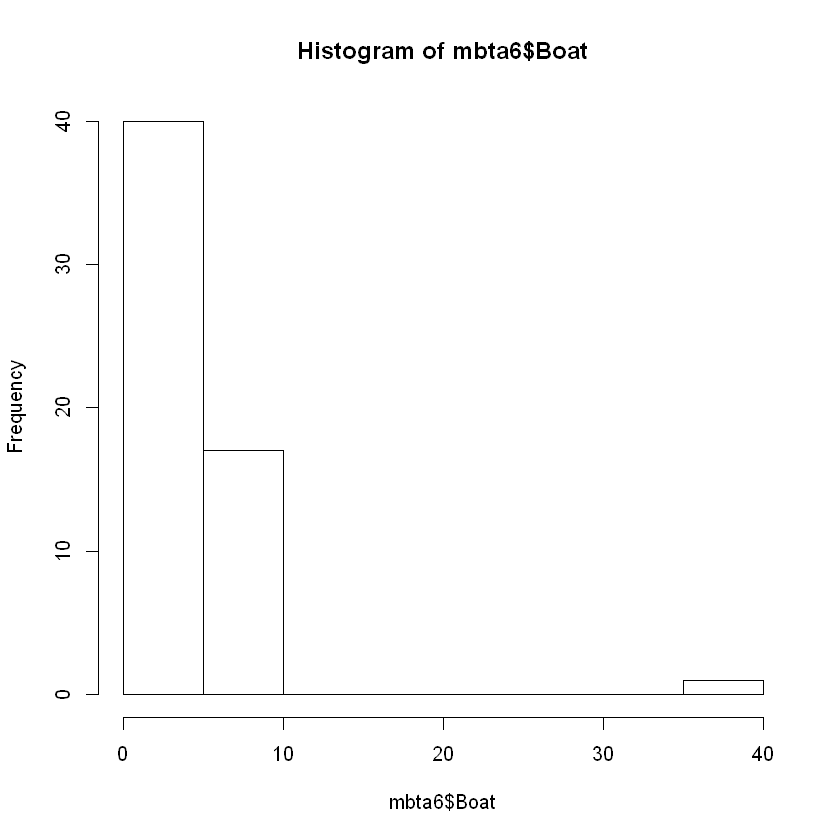

In [59]:
# View a summary of mbta6
summary(mbta6)

# Generate a histogram of Boat column
hist(mbta6$Boat)

Every value clustered around 4 and one loner out around 40. We'll address that next….

## Dealing with entry error

Let's think for a minute about that `Boat` histogram. Every month, average weekday commuter boat ridership was on either side of four thousand. Then, one month it jumped to 40 thousand without warning?

Unless the Olympics were happening in Boston that month (they weren't), this value is certainly an error. We can assume that whoever was entering the data that month accidentally typed 40 instead of 4.

Because it's an error, we don't want this value influencing our analysis. We'll locate the incorrect value and change it to 4.



ERROR: Error in ggplot(mbta_boat, aes(x = month, y = thou_riders, col = mode)): object 'mbta_boat' not found


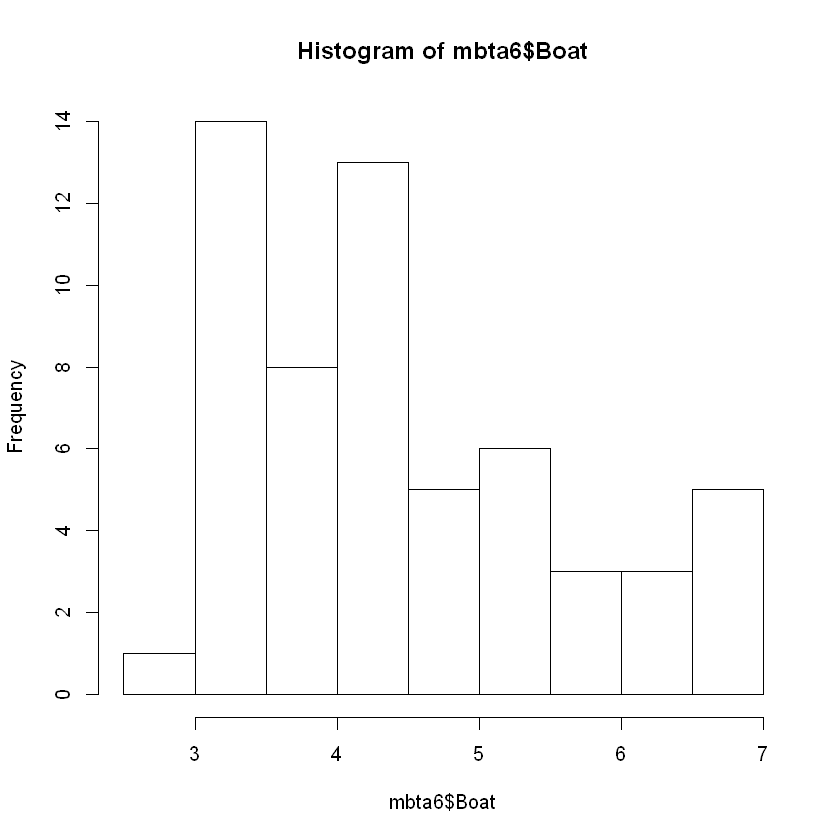

In [60]:
# Find the row number of the incorrect value: i
i <- which(mbta6$Boat>10)

# Replace the incorrect value with 4
mbta6$Boat[i] <- 4

# Generate a histogram of Boat column
hist(mbta6$Boat)

# Look at Boat and Trackless Trolley ridership over time (don't change)
ggplot(mbta_boat, aes(x = month, y = thou_riders, col = mode)) +  geom_point() + 
  scale_x_discrete(name = "Month", breaks = c(200701, 200801, 200901, 201001, 201101)) + 
  scale_y_continuous(name = "Avg Weekday Ridership (thousands)")

# Look at all T ridership over time (don't change)
ggplot(mbta_all, aes(x = month, y = thou_riders, col = mode)) + geom_point() + 
  scale_x_discrete(name = "Month", breaks = c(200701, 200801, 200901, 201001, 201101)) +  
  scale_y_continuous(name = "Avg Weekday Ridership (thousands)")

# World Food Facts

We all know that we are what you eat, so what exactly are you?We'll import and clean some data about food products from around the world.

## Importing the data

As a person of many talents, it's time to take on a different job: nutrition analysis! Our goal is to analyze the sugar content of a sample of foods from around the world.

A large dataset called `food.csv` is ready for your use. Instead of the usual `read.csv()`, however, we're going to use the faster `fread()` from the data.table package. By default, the data will come in as a data table, but since we're used to working with data frames, you can get `fread()` to return one by setting `data.table = FALSE`.


In [61]:
# Load data.table
library(data.table)

# Import food.csv as a data frame: food
food <- fread("food.csv", data.table=FALSE)

## Examining the data

In [62]:
# View summary of food
summary(food)

# View head of food
head(food)

# View structure of food
str(food)

       V1              code            url              creator         
 Min.   :   1.0   Min.   :100030   Length:1500        Length:1500       
 1st Qu.: 375.8   1st Qu.:124975   Class :character   Class :character  
 Median : 750.5   Median :149514   Mode  :character   Mode  :character  
 Mean   : 750.5   Mean   :149613                                        
 3rd Qu.:1125.2   3rd Qu.:174506                                        
 Max.   :1500.0   Max.   :199880                                        
                                                                        
   created_t         created_datetime   last_modified_t    
 Min.   :1.332e+09   Length:1500        Min.   :1.340e+09  
 1st Qu.:1.394e+09   Class :character   1st Qu.:1.424e+09  
 Median :1.425e+09   Mode  :character   Median :1.437e+09  
 Mean   :1.414e+09                      Mean   :1.430e+09  
 3rd Qu.:1.436e+09                      3rd Qu.:1.446e+09  
 Max.   :1.453e+09                      Max.   :1.453e+0

V1,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
1,100030,http://world-en.openfoodfacts.org/product/3222475745867/confiture-de-fraise-fraise-des-bois-au-sucre-de-canne-casino-delices,sebleouf,1424747544,2015-02-24T03:12:24Z,1438445887,2015-08-01T16:18:07Z,Confiture de fraise fraise des bois au sucre de canne,,...,NA,NA,NA,54,NA,NA,NA,NA,11,11
2,100050,http://world-en.openfoodfacts.org/product/5410976880110/guylian-sea-shells-selection,foodorigins,1450316429,2015-12-17T01:40:29Z,1450817956,2015-12-22T20:59:16Z,Guylian Sea Shells Selection,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,100079,http://world-en.openfoodfacts.org/product/3264750423503/pates-de-fruits-aromatisees-jacquot,domdom26,1428674916,2015-04-10T14:08:36Z,1428739289,2015-04-11T08:01:29Z,PÃƒÂ¢tes de fruits aromatisÃƒÂ©es,PÃƒÂ¢tes de fruits,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,100094,http://world-en.openfoodfacts.org/product/8006040247001/nata-vegetal-a-base-de-soja-valsoia,javichu,1420416591,2015-01-05T00:09:51Z,1420417876,2015-01-05T00:31:16Z,Nata vegetal a base de soja &quot;Valsoia&quot;,Nata vegetal a base de soja,...,NA,NA,NA,NA,NA,NA,NA,NA,11,11
5,100124,http://world-en.openfoodfacts.org/product/8480000340764/semillas-de-girasol-con-cascara-tostadas-aguasal-hacendado,javichu,1420501121,2015-01-05T23:38:41Z,1445700917,2015-10-24T15:35:17Z,Semillas de girasol con cÃƒÂ¡scara tostadas aguasal,Semillas de girasol con cÃƒÂ¡scara tostadas aguasal,...,NA,NA,NA,NA,NA,NA,NA,NA,17,17
6,100136,http://world-en.openfoodfacts.org/product/0087703177727/soft-drink,foodorigins,1437983923,2015-07-27T07:58:43Z,1445577476,2015-10-23T05:17:56Z,Soft Drink,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


'data.frame':	1500 obs. of  160 variables:
 $ V1                                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ code                                      : int  100030 100050 100079 100094 100124 100136 100194 100221 100257 100258 ...
 $ url                                       : chr  "http://world-en.openfoodfacts.org/product/3222475745867/confiture-de-fraise-fraise-des-bois-au-sucre-de-canne-casino-delices" "http://world-en.openfoodfacts.org/product/5410976880110/guylian-sea-shells-selection" "http://world-en.openfoodfacts.org/product/3264750423503/pates-de-fruits-aromatisees-jacquot" "http://world-en.openfoodfacts.org/product/8006040247001/nata-vegetal-a-base-de-soja-valsoia" ...
 $ creator                                   : chr  "sebleouf" "foodorigins" "domdom26" "javichu" ...
 $ created_t                                 : int  1424747544 1450316429 1428674916 1420416591 1420501121 1437983923 1442420988 1435686217 1436991777 1400516512 ...
 $ created_datetime         

Information overload. With datasets this big, it's hard to get a handle on exactly what they contain. 

## Inspecting variables

In [63]:
# View a glimpse of food
glimpse(food)

# View column names of food
names(food)

Rows: 1,500
Columns: 160
$ V1                                         <int> 1, 2, 3, 4, 5, 6, 7, 8, ...
$ code                                       <int> 100030, 100050, 100079, ...
$ url                                        <chr> "http://world-en.openfoo...
$ creator                                    <chr> "sebleouf", "foodorigins...
$ created_t                                  <int> 1424747544, 1450316429, ...
$ created_datetime                           <chr> "2015-02-24T03:12:24Z", ...
$ last_modified_t                            <int> 1438445887, 1450817956, ...
$ last_modified_datetime                     <chr> "2015-08-01T16:18:07Z", ...
$ product_name                               <chr> "Confiture de fraise fra...
$ generic_name                               <chr> "", "", "PÃƒÂ¢tes de fru...
$ quantity                                   <chr> "265 g", "375g", "1 kg",...
$ packaging                                  <chr> "Bocal,Verre", "Plastic,...
$ packaging_tags           

[1] "V1"                                        
  [2] "code"                                      
  [3] "url"                                       
  [4] "creator"                                   
  [5] "created_t"                                 
  [6] "created_datetime"                          
  [7] "last_modified_t"                           
  [8] "last_modified_datetime"                    
  [9] "product_name"                              
 [10] "generic_name"                              
 [11] "quantity"                                  
 [12] "packaging"                                 
 [13] "packaging_tags"                            
 [14] "brands"                                    
 [15] "brands_tags"                               
 [16] "categories"                                
 [17] "categories_tags"                           
 [18] "categories_en"                             
 [19] "origins"                                   
 [20] "origins_tags"                              
 [21] "manufacturing_places"                      
 [22] "manufacturing_places_tags"                 
 [23] "labels"                                    
 [24] "labels_tags"                               
 [25] "labels_en"                                 
 [26] "emb_codes"                                 
 [27] "emb_codes_tags"                            
 [28] "first_packaging_code_geo"                  
 [29] "cities"                                    
 [30] "cities_tags"                               
 [31] "purchase_places"                           
 [32] "stores"                                    
 [33] "countries"                                 
 [34] "countries_tags"                            
 [35] "countries_en"                              
 [36] "ingredients_text"                          
 [37] "allergens"                                 
 [38] "allergens_en"                              
 [39] "traces"                                    
 [40] "traces_tags"                               
 [41] "traces_en"                                 
 [42] "serving_size"                              
 [43] "no_nutriments"                             
 [44] "additives_n"                               
 [45] "additives"                                 
 [46] "additives_tags"                            
 [47] "additives_en"                              
 [48] "ingredients_from_palm_oil_n"               
 [49] "ingredients_from_palm_oil"                 
 [50] "ingredients_from_palm_oil_tags"            
 [51] "ingredients_that_may_be_from_palm_oil_n"   
 [52] "ingredients_that_may_be_from_palm_oil"     
 [53] "ingredients_that_may_be_from_palm_oil_tags"
 [54] "nutrition_grade_uk"                        
 [55] "nutrition_grade_fr"                        
 [56] "pnns_groups_1"                             
 [57] "pnns_groups_2"                             
 [58] "states"                                    
 [59] "states_tags"                               
 [60] "states_en"                                 
 [61] "main_category"                             
 [62] "main_category_en"                          
 [63] "image_url"                                 
 [64] "image_small_url"                           
 [65] "energy_100g"                               
 [66] "energy_from_fat_100g"                      
 [67] "fat_100g"                                  
 [68] "saturated_fat_100g"                        
 [69] "butyric_acid_100g"                         
 [70] "caproic_acid_100g"                         
 [71] "caprylic_acid_100g"                        
 [72] "capric_acid_100g"                          
 [73] "lauric_acid_100g"                          
 [74] "myristic_acid_100g"                        
 [75] "palmitic_acid_100g"                        
 [76] "stearic_acid_100g"                         
 [77] "arachidic_acid_100g"                       
 [78] "behenic_acid_100g"                         
 [79] "lignoceric_acid_1

## Removing duplicate info

Wow! That's a lot of variables. To summarize, there's some information on what and when information was added (1:9), meta information about food (10:17, 22:27), where it came from (18:21, 28:34), what it's made of (35:52), nutrition grades (53:54), some unclear (55:63), and some nutritional information (64:159).

There are also many different pairs of columns that contain duplicate information. Luckily, we have a trusty assistant who went through and identified duplicate columns for you.

A vector has been created  that lists out all of the duplicates; all we need to do is remove those columns from the dataset.
```python
my_df[, -3] # Omit third column
```

In [64]:
# Define vector of duplicate cols (don't change)
duplicates <- c(4, 6, 11, 13, 15, 17, 18, 20, 22, 
                24, 25, 28, 32, 34, 36, 38, 40, 
                44, 46, 48, 51, 54, 65, 158)

# Remove duplicates from food: food2
food2 <- food[, -duplicates]

Let's continue trimming away….

## Removing useless info

Our dataset is much more manageable already.

In addition to duplicate columns, there are many columns containing information that we just can't use. For example, the first few columns contain internal codes that don't have any meaning to us. There are also some column names that aren't clear enough to tell what they contain.

All of these columns can be deleted. Once again, our assistant did a splendid job finding the indices for you.

In [65]:
# Define useless vector (don't change)
useless <- c(1, 2, 3, 32:41)

# Remove useless columns from food2: food3
food3 <- food2[, -useless]
head(food3)

created_t,last_modified_t,last_modified_datetime,product_name,generic_name,packaging,brands,categories,origins,manufacturing_places,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
1424747544,1438445887,2015-08-01T16:18:07Z,Confiture de fraise fraise des bois au sucre de canne,,"Bocal,Verre",Casino DÃƒÂ©lices,"Aliments et boissons Ãƒ base de vÃƒÂ©gÃƒÂ©taux,Aliments d'origine vÃƒÂ©gÃƒÂ©tale,Aliments Ãƒ base de fruits et de lÃƒÂ©gumes,Petit-dÃƒÂ©jeuners,Produits Ãƒ tartiner,Fruits et produits dÃƒÂ©rivÃƒÂ©s,PÃƒÂ¢tes Ãƒ tartiner vÃƒÂ©gÃƒÂ©taux,Produits Ãƒ tartiner sucrÃƒÂ©s,Confitures et marmelades,Confitures,Confitures de fruits,Confitures de fruits rouges,Confitures de fraises",,France,...,NA,NA,NA,NA,54,NA,NA,NA,11,11
1450316429,1450817956,2015-12-22T20:59:16Z,Guylian Sea Shells Selection,,"Plastic,Box",Guylian,Chocolate,,Belgium,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1428674916,1428739289,2015-04-11T08:01:29Z,PÃƒÂ¢tes de fruits aromatisÃƒÂ©es,PÃƒÂ¢tes de fruits,"Carton,plastique",Jacquot,pÃƒÂ¢tes de fruits,,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1420416591,1420417876,2015-01-05T00:31:16Z,Nata vegetal a base de soja &quot;Valsoia&quot;,Nata vegetal a base de soja,Tetra Brik,"Valsoia,//Propiedad de://,Valsoia S.p.A.","Alimentos y bebidas de origen vegetal,Alimentos de origen vegetal,Natas vegetales,Natas vegetales a base de soja para cocinar,Natas vegetales para cocinar",,Italia,...,NA,NA,NA,NA,NA,NA,NA,NA,11,11
1420501121,1445700917,2015-10-24T15:35:17Z,Semillas de girasol con cÃƒÂ¡scara tostadas aguasal,Semillas de girasol con cÃƒÂ¡scara tostadas aguasal,"Bolsa de plÃƒÂ¡stico,Envasado en atmÃƒÂ³sfera protectora","Hacendado,//Propiedad de://,Mercadona S.A.","Semillas de girasol y derivados, Semillas, Semillas de girasol, Semillas de girasol con cÃƒÂ¡scara, Semillas de girasol tostadas, Semillas de girasol con cÃƒÂ¡scara tostadas, Semillas de girasol con cÃƒÂ¡scara tostadas aguasal",Argentina,"Beniparrell,Valencia (provincia),Comunidad Valenciana,EspaÃƒÂ±a",...,NA,NA,NA,NA,NA,NA,NA,NA,17,17
1437983923,1445577476,2015-10-23T05:17:56Z,Soft Drink,,,,,South Korea,South Korea,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Now we can actually navigate the data without getting lost in all the junk.

## Finding columns

Looking much nicer! Our goal is analyzing the sugar content of these foods. Therefore, our next step is to look at a summary of the nutrition information.

All of the columns with nutrition info contain the character string "`100g`" as part of their name, which makes it easy to identify them.

In [66]:
# Create vector of column indices: nutrition
nutrition <- str_detect(names(food3), "100g")

# View a summary of nutrition columns
summary(food3[,nutrition])

 energy_from_fat_100g    fat_100g      saturated_fat_100g butyric_acid_100g
 Min.   :   0.00      Min.   :  0.00   Min.   : 0.000     Mode:logical     
 1st Qu.:  35.98      1st Qu.:  0.90   1st Qu.: 0.200     NA's:1500        
 Median : 237.00      Median :  6.00   Median : 1.700                      
 Mean   : 668.41      Mean   : 13.39   Mean   : 4.874                      
 3rd Qu.: 974.00      3rd Qu.: 20.00   3rd Qu.: 6.500                      
 Max.   :2900.00      Max.   :100.00   Max.   :57.000                      
 NA's   :1486         NA's   :708      NA's   :797                         
 caproic_acid_100g caprylic_acid_100g capric_acid_100g lauric_acid_100g
 Mode:logical      Mode:logical       Mode:logical     Mode:logical    
 NA's:1500         NA's:1500          NA's:1500        NA's:1500       
                                                                       
                                                                       
                                

## Replacing missing values

Unfortunately, the summary revealed that the nutrition data are mostly NA values. After consulting with the lab technician, it appears that much of the data is missing because the food just doesn't have those nutrients.

But all is not lost! The lab tech also said that for sugar content, zero values are sometimes entered explicitly, but sometimes the values are just left empty to denote a zero. A statistical miracle!

We'll replace all `NA` values with zeroes in the `sugars_100g` column and make histograms to visualize the result. Then, we will exclude the observations which have no sugar to see how the distribution changes.

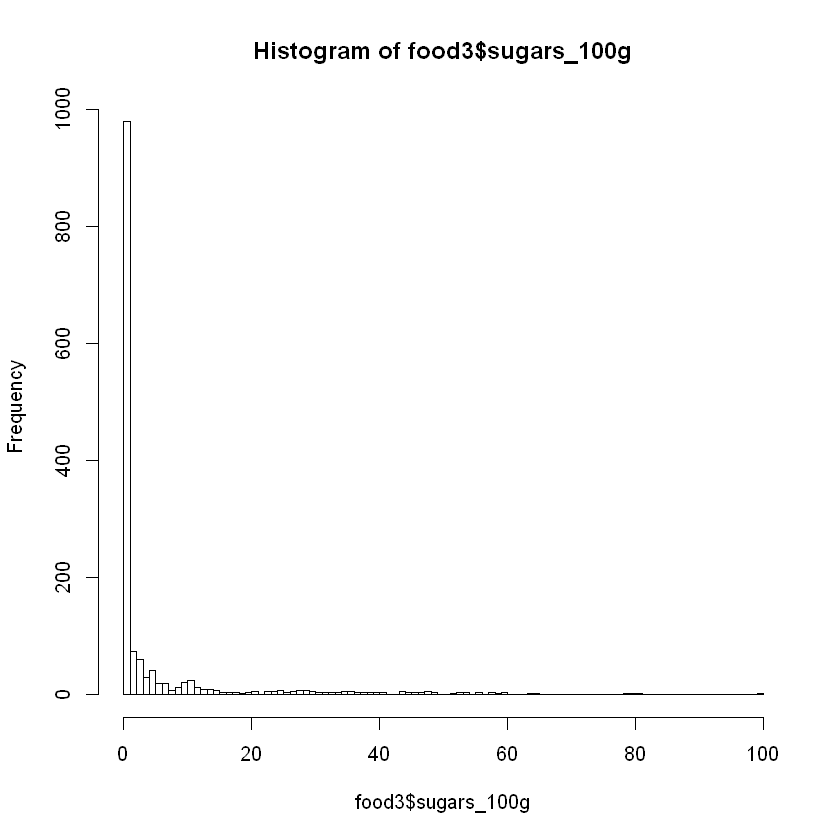

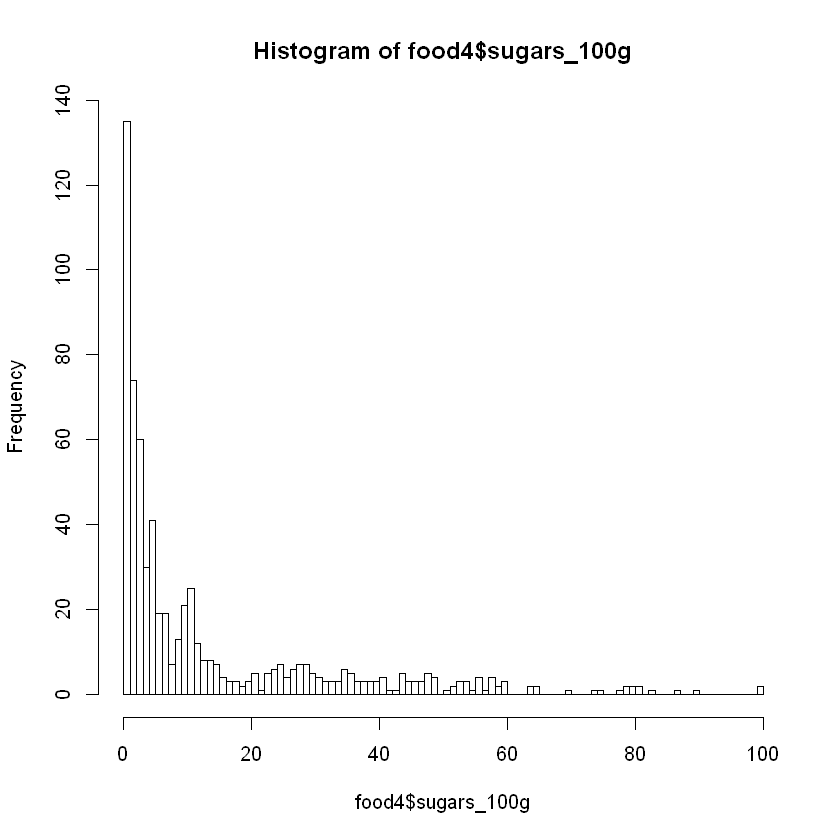

In [67]:
# Find indices of sugar NA values: missing
missing <- is.na(food3$sugars_100g)

# Replace NA values with 0
food3$sugars_100g[missing] <- 0

# Create first histogram
hist(food3$sugars_100g, breaks=100)

# Create food4
food4 <- food3[food3$sugars_100g>0, ]

# Create second histogram
hist(food4$sugars_100g, breaks=100)


 Excluding the observations which don't contain any sugar, we can better visualize what the underlying distribution looks like… And now, for something completely different.
 
 ## Dealing with messy data
 
 Our analysis of sugar content was so impressive that we've now been tasked with determining how many of these foods come in some sort of plastic packaging. (No good deed goes unpunished, as they say.)

Our dataset has information about packaging, but there's a bit of a problem: it's stored in several different languages (Spanish, French, and English). This takes messy data to a whole new level! There is no R package to selectively translate, but what if you could just work with the messy data directly?

We're in luck! The root word for plastic is same in English (plastic), French (plastique), and Spanish (plastico). To get a general idea of how many of these foods are packaged in plastic, we can look through the `packaging` column for the string "plasti".

In [68]:
# Find entries containing "plasti": plastic
plastic <- str_detect(food3$packaging, "plasti")

# Print the sum of plastic
sum(plastic)

[1] 232

This dataset was not very friendly, but you made the best of it. The final chapter is next!

# School Attendance Data

![](http://s3.amazonaws.com/assets.datacamp.com/production/course_1294/datasets/attendance_screenshot.png)

import and clean a gnarly dataset containing information on average school attendance in the US.

## Importing the data

We'll work with attendance data from public schools in the US, organized by school level and state, during the 2007-2008 academic year. The data contain information on average daily attendance (ADA) as a percentage of total enrollment, school day length, and school year length.

The data were given to us in an Excel spreadsheet, which you can [download](http://s3.amazonaws.com/assets.datacamp.com/production/course_1294/datasets/attendance.xls) or [view](http://s3.amazonaws.com/assets.datacamp.com/production/course_1294/datasets/attendance_screenshot.png) a screenshot of. 

At first glance, it looks like the first row is a description of the data, the second row is a variable itself that groups multiple columns together, and the fourth row gives numbers for the columns, which might look nice in a spreadsheet but isn't very useful for us, the analyst.

we'll take it one step at a time to import the data using the gdata package. The name of this spreadsheet is `"attendance.xls"`.

In [76]:
# Import the spreadsheet: att
att <- read.xls("attendance.xls", perl = "C:\\Perl64\\bin\\perl.exe")

## Examining the data

In [77]:
# Print the column names 
names(att)

# Print the first 6 rows
head(att)

# Print the last 6 rows
tail(att)

# Print the structure
str(att)

[1] "Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08"
 [2] "X"                                                                                                                                                                            
 [3] "X.1"                                                                                                                                                                          
 [4] "X.2"                                                                                                                                                                          
 [5] "X.3"                                                                                                                                                                          
 [6] "X.4"                                                                                                                                                                          
 [7] "X.5"                                                                                                                                                                          
 [8] "X.6"                                                                                                                                                                          
 [9] "X.7"                                                                                                                                                                          
[10] "X.8"                                                                                                                                                                          
[11] "X.9"                                                                                                                                                                          
[12] "X.10"                                                                                                                                                                         
[13] "X.11"                                                                                                                                                                         
[14] "X.12"                                                                                                                                                                         
[15] "X.13"                                                                                                                                                                         
[16] "X.14"                                                                                                                                                                         
[17] "X.15"

Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15
,"Total elementary, secondary, and combined elementary/secondary schools",,,,,,,,Elementary schools,,,,Secondary schools,,,
,ADA as percent of enrollment,,Average hours in school day,,Average days in school year,,Average hours in school year,,ADA as percent of enrollment,,Average hours in school day,,ADA as percent of enrollment,,Average hours in school day,
1,2,,3,,4,,5,,6,,7,,8,,9,
United States ........,93.1,(0.22),6.6,(0.02),180,(0.1),"1,193",(3.1),94.0,(0.27),6.7,(0.02),91.1,(0.43),6.6,(0.04)
Alabama .................,93.8,(1.24),7.0,(0.07),180,(0.8),"1,267",(12.3),93.8,(1.84),7.0,(0.08),94.6,(0.38),7.1,(0.17)
Alaska ..................,89.9,(1.22),6.5,(0.05),180,(3.4),"1,163",(22.9),91.3,(1.56),6.5,(0.05),93.2,(1.57),6.2,(0.15)


,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15
54,Wisconsin ...............,95.0,(0.57),6.9,(0.04),180,(0.7),"1,246",(8.6),95.4,(0.41),6.9,(0.05),93.0,(1.91),7.0,(0.14)
55,Wyoming .................,92.4,(1.15),6.9,(0.05),175,(1.3),"1,201",(8.3),92.2,(1.65),6.9,(0.05),92.4,(0.75),7.0,(0.07)
56,â€ Not applicable.,,,,,,,,,,,,,,,,
57,â€¡Reporting standards not met (too few cases).,,,,,,,,,,,,,,,,
58,"NOTE: Averages reflect data reported by schools rather than state requirements. School-reported length of day may exceed state requirements, and there is a range of statistical error in reported estimates. Standard errors appear in parentheses.",,,,,,,,,,,,,,,,
59,"SOURCE: U.S. Department of Education, National Center for Education Statistics, Schools and Staffing Survey (SASS), \Public School Questionnaire",\ 2003-04 and 2007-08. (This table was prepared June 2011.),,,,,,,,,,,,,,,


'data.frame':	59 obs. of  17 variables:
 $ Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08: Factor w/ 58 levels "","   United States ........",..: 1 1 3 2 6 7 8 9 10 11 ...
 $ X                                                                                                                                                                            : Factor w/ 42 levels "","\\ 2003-04 and 2007-08. (This table was prepared June 2011.)",..: 42 41 3 22 28 8 6 14 23 29 ...
 $ X.1                                                                                                                                                                          : Factor w/ 45 levels "","(0.22)","(0.23)",..: 1 1 1 2 22 21 41 27 14 6 ...
 $ X.2                                                                                                                                                

These are some messy data! The column names are mostly missing, there are irrelevant notes at the end of the data frame, and it looks like the numeric data were imported as factors. Let's start the cleaning process!

## Removing unnecessary rows

rows 1, 4, 11, and 17 of the spreadsheet are useless. 

In [78]:
# Create remove
remove = c(3, 56:59)

# Create att2
att2 <- att[-remove,]
head(att2)

,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15
1,,"Total elementary, secondary, and combined elementary/secondary schools",,,,,,,,Elementary schools,,,,Secondary schools,,,
2,,ADA as percent of enrollment,,Average hours in school day,,Average days in school year,,Average hours in school year,,ADA as percent of enrollment,,Average hours in school day,,ADA as percent of enrollment,,Average hours in school day,
4,United States ........,93.1,(0.22),6.6,(0.02),180,(0.1),"1,193",(3.1),94.0,(0.27),6.7,(0.02),91.1,(0.43),6.6,(0.04)
5,Alabama .................,93.8,(1.24),7.0,(0.07),180,(0.8),"1,267",(12.3),93.8,(1.84),7.0,(0.08),94.6,(0.38),7.1,(0.17)
6,Alaska ..................,89.9,(1.22),6.5,(0.05),180,(3.4),"1,163",(22.9),91.3,(1.56),6.5,(0.05),93.2,(1.57),6.2,(0.15)
7,Arizona .................,89.0,(2.95),6.4,(0.09),181,(1.7),"1,159",(14.4),88.9,(3.91),6.4,(0.10),89.0,(3.22),6.4,(0.25)


We have gotten rid of all the unnecessary rows. Next, We'll get rid of all the unnecessary columns!

## Removing useless columns

columns 3, 5, 7, 9, 11, 13, 15, and 17 (or columns C, E, G, I, K, M, O, Q in Excel) don't contain the values of average daily attendance (ADA). You'll get rid of them.

In [79]:
# Create remove
remove <- c(3, 5, 7, 9, 11, 13, 15, 17)

# Create att3
att3 <- att2[,-remove]
head(att3)

,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.2,X.4,X.6,X.8,X.10,X.12,X.14
1,,"Total elementary, secondary, and combined elementary/secondary schools",,,,Elementary schools,,Secondary schools,
2,,ADA as percent of enrollment,Average hours in school day,Average days in school year,Average hours in school year,ADA as percent of enrollment,Average hours in school day,ADA as percent of enrollment,Average hours in school day
4,United States ........,93.1,6.6,180,"1,193",94.0,6.7,91.1,6.6
5,Alabama .................,93.8,7.0,180,"1,267",93.8,7.0,94.6,7.1
6,Alaska ..................,89.9,6.5,180,"1,163",91.3,6.5,93.2,6.2
7,Arizona .................,89.0,6.4,181,"1,159",88.9,6.4,89.0,6.4


## Splitting the data

In many cases, a single data frame stores multiple "tables" of information. We can often diagnose this problem by looking at the column names and noticing duplicate rows.

In this data frame, columns 1, 6, and 7 represent attendance data for US elementary schools, columns 1, 8, and 9 represent data for secondary schools, and columns 1 through 5 represent data for all schools in the US.

Each of these should be stored as its own separate data frame, so we'll split them up here.

In [80]:
# Subset just elementary schools: att_elem
att_elem <- att3[,c(1,6,7)]
head(att_elem)

# Subset just secondary schools: att_sec
att_sec <- att3[,c(1,8,9)]
head(att_sec)

# Subset all schools: att4
att4 <- att3[,c(1:5)]
head(att4)

,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X.8,X.10
1,,Elementary schools,
2,,ADA as percent of enrollment,Average hours in school day
4,United States ........,94.0,6.7
5,Alabama .................,93.8,7.0
6,Alaska ..................,91.3,6.5
7,Arizona .................,88.9,6.4


,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X.12,X.14
1,,Secondary schools,
2,,ADA as percent of enrollment,Average hours in school day
4,United States ........,91.1,6.6
5,Alabama .................,94.6,7.1
6,Alaska ..................,93.2,6.2
7,Arizona .................,89.0,6.4


,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.2,X.4,X.6
1,,"Total elementary, secondary, and combined elementary/secondary schools",,,
2,,ADA as percent of enrollment,Average hours in school day,Average days in school year,Average hours in school year
4,United States ........,93.1,6.6,180,"1,193"
5,Alabama .................,93.8,7.0,180,"1,267"
6,Alaska ..................,89.9,6.5,180,"1,163"
7,Arizona .................,89.0,6.4,181,"1,159"


From here on, we'll just be working with the data pertaining to all schools in the US.

## Replacing the names

Since you went through so much trouble finding out which row stored the variable names, we should store that row as the actual column names of the data frame. We've modified the names a bit in order to be more stylistically sound; they're stored as `cnames`.

This will also allow us to remove the first two rows (currently storing variable names).

In [81]:
# Define cnames vector (don't change)
cnames <- c("state", "avg_attend_pct", "avg_hr_per_day", 
            "avg_day_per_yr", "avg_hr_per_yr")

# Assign column names of att4
colnames(att4) <- cnames

# Remove first two rows of att4: att5
att5 <- att4[-(c(1:2)),]

# View the names of att5
names(att5)
head(att5)

[1] "state"          "avg_attend_pct" "avg_hr_per_day" "avg_day_per_yr"
[5] "avg_hr_per_yr"

,state,avg_attend_pct,avg_hr_per_day,avg_day_per_yr,avg_hr_per_yr
4,United States ........,93.1,6.6,180,"1,193"
5,Alabama .................,93.8,7.0,180,"1,267"
6,Alaska ..................,89.9,6.5,180,"1,163"
7,Arizona .................,89.0,6.4,181,"1,159"
8,Arkansas ................,91.8,6.9,179,"1,229"
9,California ..............,93.2,6.2,181,"1,129"


Next, we'll clean up the state names.

## Cleaning up extra characters

One of the most irritating things about this dataset is that the state names are all stored as the same number of characters, with periods padding the ends of the shorter states. That may be helpful for reading the spreadsheet, but it makes our life harder, so we'll deal with it in this exercise.

One pitfall to avoid: `.` is a special character in the language of regular expressions (a.k.a. regex). In order to specify that we actually want to remove periods and not their regex equivalent (which is "all characters"), use `\\.`. This is called an "escape" sequence.

In [82]:
# Remove all periods in state column
att5$state <- str_replace_all(att5$state, "\\.", "")

# Remove white space around state names
att5$state <- str_trim(att5$state)

# View the head of att5
head(att5)

,state,avg_attend_pct,avg_hr_per_day,avg_day_per_yr,avg_hr_per_yr
4,United States,93.1,6.6,180,"1,193"
5,Alabama,93.8,7.0,180,"1,267"
6,Alaska,89.9,6.5,180,"1,163"
7,Arizona,89.0,6.4,181,"1,159"
8,Arkansas,91.8,6.9,179,"1,229"
9,California,93.2,6.2,181,"1,129"


In the next and final exercise, we'll do one last type conversion.

## Some final type conversions

Finally, we'll convert the values in certain variables to numerics (instead of factors). It's worth noting that in previous codes, our numerical data has often come in as character strings. This is just a difference between `read.xls()` and the other import functions you've used.

The dplyr package offers an efficient method for applying a function to many columns at once. 

In [83]:
# Change columns to numeric using dplyr (don't change)
library(dplyr)
example <- mutate_at(att5, vars(-state), funs(as.numeric))

# Define vector containing numerical columns: cols
cols <- c(2:5)

# Use sapply to coerce cols to numeric
att5[, cols] <- sapply(att5[, cols], as.numeric)
summary(att5)

Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

    state           avg_attend_pct  avg_hr_per_day   avg_day_per_yr 
 Length:52          Min.   : 4.00   Min.   : 3.000   Min.   : 2.00  
 Class :character   1st Qu.:14.75   1st Qu.: 6.000   1st Qu.: 7.75  
 Mode  :character   Median :22.00   Median : 7.000   Median :10.00  
                    Mean   :22.92   Mean   : 7.635   Mean   : 9.00  
                    3rd Qu.:32.25   3rd Qu.:10.000   3rd Qu.:11.00  
                    Max.   :40.00   Max.   :13.000   Max.   :13.00  
 avg_hr_per_yr  
 Min.   : 2.00  
 1st Qu.:14.75  
 Median :24.50  
 Mean   :24.60  
 3rd Qu.:36.00  
 Max.   :46.00  

That wasn't an easy dataset to clean, but you handled it beautifully. 